In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/MCUT/R911R912
!pwd
!ls

/content/drive/MyDrive/MCUT/R911R912
/content/drive/MyDrive/MCUT/R911R912
20220413		code	     test.csv
ARO1_pearsonr_corr.csv	data	     Untitled0.ipynb
ARO1特徵因子分析.ipynb	dataset.pkl  Untitled1.ipynb
ARO2_pearsonr_corr.csv	model
ARO2特徵因子分析.ipynb	PPT


In [ ]:
import pandas as pd

df = pd.read_csv("data/吸附室毒化物探索分析.csv", encoding="CP950")
for i in df.columns:
  df[i] = pd.to_numeric(df[i],errors='coerce')

df

,產品中MX(ppm),BZ,A9,A10,S,CI,Br
0,484.324520,5.701678,6.207741,2.505411,11.919812,55.109481,-188.663660
1,465.164759,16.261350,14.344586,3.807352,19.244340,52.690648,169.526452
2,455.956341,25.392156,28.540948,5.199775,21.503458,43.337283,-359.428856
3,445.020905,32.896417,47.833247,6.480390,4.747717,39.183333,52.776208
4,464.590354,40.540043,68.848186,7.889991,-3.291241,45.060636,1839.020196
...,...,...,...,...,...,...,...
491,1603.958333,1312.262913,6940.113658,651.037233,5422.253054,3852.899548,340547.312400
492,1605.000000,1313.000728,6945.631178,652.078856,5397.296661,3850.090809,340874.465500
493,1605.000000,1313.545878,6950.015080,653.115213,5388.637603,3853.851585,342631.320800
494,1605.000000,1314.343352,6954.275054,654.147755,5395.016487,3856.310406,343581.819200


In [ ]:
df.columns

Index(['產品中MX(ppm)', 'BZ', 'A9', 'A10', 'S', 'CI', 'Br'], dtype='object')

In [ ]:
dic = {
    "產品中MX(ppm)":"MX",
    "BZ":"BZ",
    "A9":"A9",
    "A10":"A10",
    "S":"硫",
    "CI":"氯",
    "Br":"Br"
}

In [ ]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
  # Total missing values
  mis_val = df.isnull().sum()
  
  # Percentage of missing values
  mis_val_percent = 100 * df.isnull().sum() / len(df)
  
  # Make a table with the results
  mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
  
  # Rename the columns
  mis_val_table_ren_columns = mis_val_table.rename(
  columns = {0 : 'Missing Values', 1 : '% of Total Values'})
  
  # Sort the table by percentage of missing descending
  mis_val_table_ren_columns = mis_val_table_ren_columns[
      mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
  '% of Total Values', ascending=False).round(1)
  
  # Print some summary information
  print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
      "There are " + str(mis_val_table_ren_columns.shape[0]) +
        " columns that have missing values.")
  rownames = [dic[i] for i in mis_val_table_ren_columns.index.to_list()]
  mis_val_table_ren_columns.index = rownames

  # Return the dataframe with missing information
  return mis_val_table_ren_columns

# Missing values statistics
missing_values = missing_values_table(df)
missing_values.head(29)

Your selected dataframe has 7 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


<font size = 5>1.Removing features with low variance</font>

In [ ]:
import statistics as stat
print("df:")
for c in df.columns.tolist():
  varianceNb = stat.variance(df[c].dropna(axis="index"))
  print(dic[c],'變異數 : ', varianceNb)

df:
MX 變異數 :  112760.18729409105
BZ 變異數 :  115545.07456869229
A9 變異數 :  3979106.673232192
A10 變異數 :  36561.54449509238
硫 變異數 :  2745763.9659130382
氯 變異數 :  996956.974899906
Br 變異數 :  11689068627.759024


In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression

def SELECTKBEST(data, k, x_col, y_col, dic):
  
  """
  Suppose, we select 5 features with top 5 Fisher scores
  New dataframe with the selected features for later use in the classifier. fit() method works too, 
  if you want only the feature names and their corresponding scores
  """

  table = data[x_col + [y_col]].dropna()
  selector = SelectKBest(f_regression, k = k)
  X_new = selector.fit_transform(table.loc[:,x_col], table.loc[:,y_col])
  names = table.loc[:,x_col].columns.values[selector.get_support()]
  names= [dic[i] for i in names.tolist()]
  scores = selector.scores_[selector.get_support()]
  names_scores = list(zip(names, [dic[y_col] for j in range(k)], scores))
  ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', "target_name",'F_Scores'])
  #Sort the dataframe for better visualization
  ns_df_sorted = ns_df.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])
  x_new = ns_df_sorted.reset_index(inplace = False).iloc[:,1:]
  
  return x_new

In [ ]:
print("MX:")
display(SELECTKBEST(data = df, k = 6, x_col = list(df.columns[1:]), y_col = '產品中MX(ppm)', dic = dic))

MX:


,Feat_names,target_name,F_Scores
0,BZ,MX,5892.239419
1,氯,MX,2746.238108
2,硫,MX,2696.287968
3,A10,MX,2373.655579
4,A9,MX,2242.454415
5,Br,MX,2074.332441


<font size = 5>pearsonr</font>

In [ ]:
from scipy.stats import pearsonr

def PEARSON(data, dic, x_col, y_col):
  
  pearsonr_corr_list = []
  p_value_list = []
  names = []
  
  for i in x_col:
    table = data[[i, y_col]].dropna()
    pearsonr_corr ,p_value = pearsonr(table[i], table[y_col])
    names.append(dic[i])
    pearsonr_corr_list.append(pearsonr_corr)
    p_value_list.append(p_value)
  
  data = pd.DataFrame({"X":names, "Y":dic[y_col], "pearsonr_corr":pearsonr_corr_list, "p_value":p_value_list})
  data['abs_pearsonr_corr'] = abs(data['pearsonr_corr'])
  data = data.sort_values(by=['abs_pearsonr_corr'], ascending=False)
  return data

In [ ]:
print("MX:")
display(PEARSON(data = df, dic = dic, x_col = list(df.columns[1:]), y_col = '產品中MX(ppm)'))

MX:


,X,Y,pearsonr_corr,p_value,abs_pearsonr_corr
0,BZ,MX,0.960545,1.064777e-276,0.960545
4,氯,MX,0.920620,6.740229e-204,0.920620
3,硫,MX,0.919323,3.131864e-202,0.919323
2,A10,MX,0.909799,8.652060e-191,0.909799
1,A9,MX,0.905248,9.182543e-186,0.905248
5,Br,MX,0.898698,5.857816e-179,0.898698


<font size = 5>Model based ranking</font>

Ridge

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.feature_selection import SelectFromModel

def RIDGE(data, dic, x_col, y_col):
  table = data[x_col + [y_col]].dropna()
  ridge = Ridge()
  ridge.fit(table[x_col], table[y_col])
  coef = ridge.coef_.reshape(-1).tolist()
  names = [dic[i] for i in x_col]
  data = pd.DataFrame({"X":names, "Y":dic[y_col], "coef":coef})
  data['abs_coef'] = abs(data['coef'])
  data = data.sort_values(by=['abs_coef'], ascending=False)
  return data

In [ ]:
print("NX:")
display(RIDGE(data = df, dic = dic, x_col = list(df.columns[1:]), y_col = '產品中MX(ppm)'))

NX:


,X,Y,coef,abs_coef
2,A10,MX,-2.310635,2.310635
0,BZ,MX,1.766641,1.766641
4,氯,MX,-0.417683,0.417683
1,A9,MX,0.280156,0.280156
3,硫,MX,-0.135946,0.135946
5,Br,MX,0.002358,0.002358


Lasso

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

def LASSO(data, dic, x_col, y_col, alpha):
  
  table = data[x_col + [y_col]].dropna()
  lasso = Lasso(alpha = alpha ,positive=True)
  lasso.fit(table[x_col], table[y_col])
  coef = lasso.coef_.reshape(-1).tolist()
  names = [dic[i] for i in x_col]
  data = pd.DataFrame({"X":names, "Y":dic[y_col], "coef":coef})
  data['abs_coef'] = abs(data['coef'])
  data = data.sort_values(by=['abs_coef'], ascending=False)
  
  return data

In [ ]:
print("MX:")
display(LASSO(data = df, dic = dic, x_col = list(df.columns[1:]), y_col = '產品中MX(ppm)', alpha = 0.01))

MX:


,X,Y,coef,abs_coef
0,BZ,MX,0.948712,0.948712
1,A9,MX,0.000048,0.000048
2,A10,MX,0.000000,0.000000
3,硫,MX,0.000000,0.000000
4,氯,MX,0.000000,0.000000
5,Br,MX,0.000000,0.000000


<font size = 5>Xgboost</font>

In [ ]:
from sklearn.linear_model import LinearRegression
import xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from xgboost import plot_importance
import matplotlib.pyplot as plt
import seaborn as sb

def XGBOOST(data, dic, x_col, y_col):
  
  table = data[x_col + [y_col]].dropna()
  table_corr = table.corr()[y_col]
  features = table_corr.abs()[x_col].sort_values(ascending=False).index.tolist()
  print(features, ':', y_col)
  table_xgbr = table[features + [y_col]].dropna(axis=0)
  X = table_xgbr[x_col]
  Y = table_xgbr[y_col]

  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
    
  model = XGBRegressor()
  model.fit(X_train, y_train)
  display(f'{y_col} 驗證分數:', model.score(X_test, y_test))
  plot_importance(model)
  plt.show()

['BZ', 'CI', 'S', 'A10', 'A9', 'Br'] : 產品中MX(ppm)


'產品中MX(ppm) 驗證分數:'

0.988977852095736

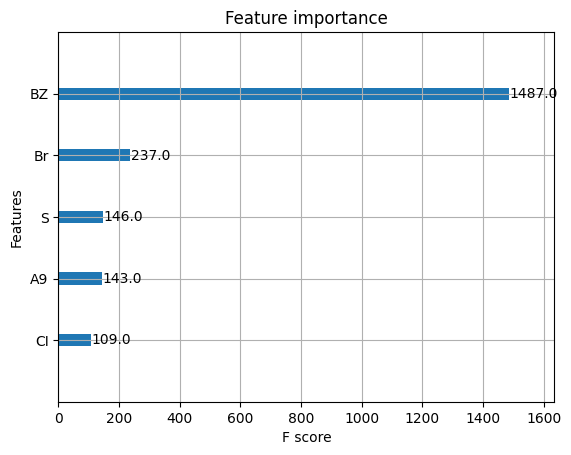

In [ ]:
XGBOOST(data = df, dic = dic, x_col = list(df.columns[1:]), y_col = '產品中MX(ppm)')